In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('mar_apr_all_data_df_emb_kmeans.csv')
data.head()

,batch,batch_id,count,topic_rep,topic_cluster_label
0,mar_1_7,1,60,ai language memory think just other some don r...,1
1,mar_1_7,2,12,ukraine putin nato russia war russian nukes we...,3
2,mar_1_7,3,11,vaccine immune measles chewing paternity tatto...,9
3,mar_1_7,4,11,mozilla firefox browsers browser chrome chromi...,2
4,mar_1_7,5,9,congress federal government spending president...,6


Note: 3909 total documents, 1377 documents clustered, average of 6 topics per batch

<ipython-input-6-d75a3e3b81d1>:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = data_temp.pivot_table(


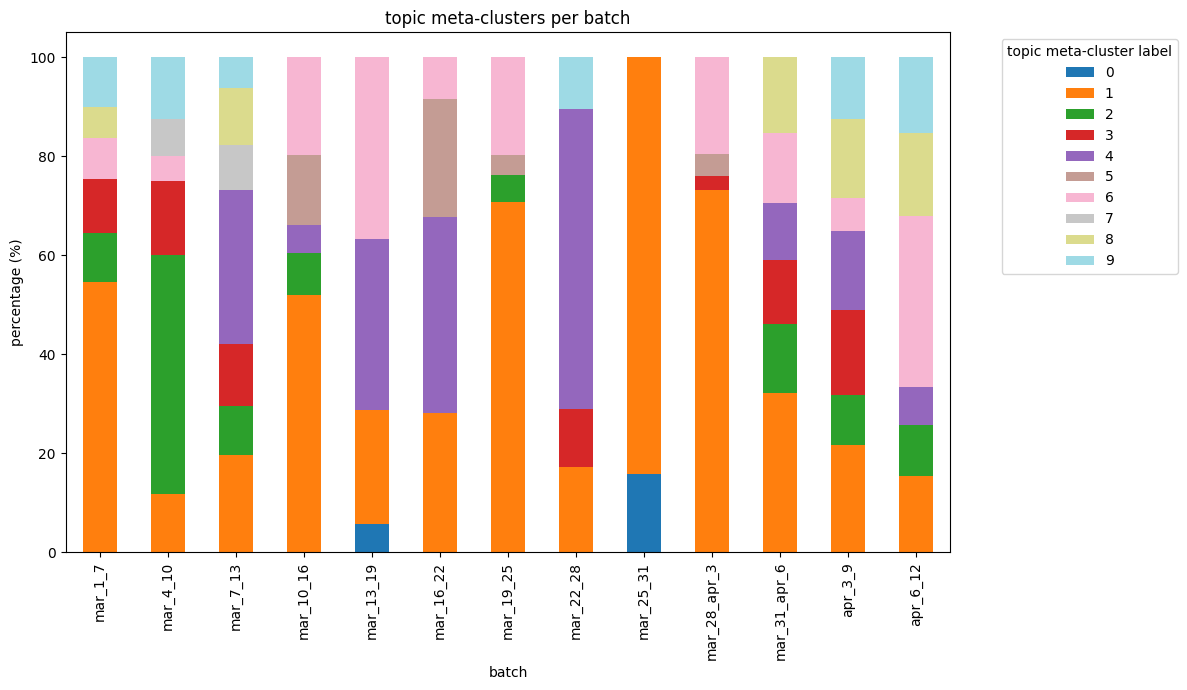

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data_temp = data.copy()

data_temp['batch_total'] = data_temp.groupby('batch')['count'].transform('sum')
data_temp['percentage'] = (data_temp['count'] / data_temp['batch_total']) * 100
batch_order = data_temp['batch'].drop_duplicates()
data_temp['batch'] = pd.Categorical(data_temp['batch'], categories=batch_order, ordered=True)

pivot_df = data_temp.pivot_table(
    index='batch',
    columns='topic_cluster_label',
    values='percentage',
    aggfunc='sum'
).fillna(0)

pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='tab20'
)

plt.title('topic meta-clusters per batch')
plt.ylabel('percentage (%)')
plt.xlabel('batch')
plt.legend(title='topic meta-cluster label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [7]:
batch_map = {
    'mar_1_7': 1,
    'mar_4_10': 2,
    'mar_7_13': 3,
    'mar_10_16': 4,
    'mar_13_19': 5,
    'mar_16_22': 6,
    'mar_19_25': 7,
    'mar_22_28': 8,
    'mar_25_31': 9,
    'mar_28_apr_3': 10,
    'mar_31_apr_6': 11,
    'apr_3_9': 12,
    'apr_6_12': 13
}

data['batch'] = data['batch'].replace(batch_map)
data['batch'] = pd.to_numeric(data['batch'], errors='coerce').astype('Int64')

<ipython-input-7-e7fa18aa1d26>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['batch'] = data['batch'].replace(batch_map)


In [8]:
data = data.sort_values(['topic_cluster_label', 'batch'])

In [9]:
data.head(-10)

,batch,batch_id,count,topic_rep,topic_cluster_label
29,5,6,5,twitter media bsky social bluesky political tr...,0
48,9,2,12,politicians law trump government legal politic...,0
49,9,3,11,phishing privacy security emails domain passwo...,0
0,1,1,60,ai language memory think just other some don r...,1
9,2,4,14,ai make llms company llm money really openai d...,1
...,...,...,...,...,...
10,2,5,9,deported hamas terrorist protests freedom amen...,7
17,3,6,10,deported hamas protests immigration terrorist ...,7
5,1,6,7,ram intel vram memory hardware cores cpus perf...,8
15,3,4,13,firmware apple hardware esp32 devices bluetoot...,8


In [10]:
conditions = [
    data['batch'].between(1, 5),
    data['batch'].between(6, 9),
    data['batch'].between(10, 13)
]
choices = [1, 2, 3]

data['third'] = np.select(conditions, choices, default=np.nan)


In [11]:
data.head(-10)

,batch,batch_id,count,topic_rep,topic_cluster_label,third
29,5,6,5,twitter media bsky social bluesky political tr...,0,1.0
48,9,2,12,politicians law trump government legal politic...,0,2.0
49,9,3,11,phishing privacy security emails domain passwo...,0,2.0
0,1,1,60,ai language memory think just other some don r...,1,1.0
9,2,4,14,ai make llms company llm money really openai d...,1,1.0
...,...,...,...,...,...,...
10,2,5,9,deported hamas terrorist protests freedom amen...,7,1.0
17,3,6,10,deported hamas protests immigration terrorist ...,7,1.0
5,1,6,7,ram intel vram memory hardware cores cpus perf...,8,1.0
15,3,4,13,firmware apple hardware esp32 devices bluetoot...,8,1.0


In [12]:
required = {1, 2, 3}

filtered_df = (
    data
      .groupby('topic_cluster_label')
      .filter(lambda g: required.issubset(set(g['third'].dropna().astype(int))))
)

filtered_df.head(50)


,batch,batch_id,count,topic_rep,topic_cluster_label,third
0,1,1,60,ai language memory think just other some don r...,1,1.0
9,2,4,14,ai make llms company llm money really openai d...,1,1.0
13,3,2,22,engineers engineer ai work company make most s...,1,1.0
19,4,1,55,ai language are really llms think things llm w...,1,1.0
26,5,3,11,tech engineer engineering work engineers job w...,1,1.0
27,5,4,9,ai learning neural code training what understa...,1,1.0
32,6,3,11,softbank o1 company google get patent venv bet...,1,2.0
33,6,4,9,species evolution permian galaxies world unive...,1,2.0
36,7,1,68,ai build github rust ci don really just me we ...,1,2.0
38,7,3,11,adhd life tech work you what think be about me...,1,2.0


In [13]:
filtered_df['gradient'] = (
    filtered_df
      .groupby('topic_cluster_label')['count']
      .transform(lambda x: x.diff() / x.shift(1))
)


In [15]:
filtered_df.head(40)

,batch,batch_id,count,topic_rep,topic_cluster_label,third,gradient
0,1,1,60,ai language memory think just other some don r...,1,1.0,NaN
9,2,4,14,ai make llms company llm money really openai d...,1,1.0,-0.766667
13,3,2,22,engineers engineer ai work company make most s...,1,1.0,0.571429
19,4,1,55,ai language are really llms think things llm w...,1,1.0,1.500000
26,5,3,11,tech engineer engineering work engineers job w...,1,1.0,-0.800000
27,5,4,9,ai learning neural code training what understa...,1,1.0,-0.181818
32,6,3,11,softbank o1 company google get patent venv bet...,1,2.0,0.222222
33,6,4,9,species evolution permian galaxies world unive...,1,2.0,-0.181818
36,7,1,68,ai build github rust ci don really just me we ...,1,2.0,6.555556
38,7,3,11,adhd life tech work you what think be about me...,1,2.0,-0.838235


In [16]:
filtered_df = filtered_df.sort_values(['topic_cluster_label', 'batch'])

# then compute a 3-batch rolling mean of `count` within each cluster
filtered_df['rolling_avg_count'] = (
    filtered_df
      .groupby('topic_cluster_label')['count']
      .transform(lambda x: x.rolling(window=3, min_periods=3).mean())
)
filtered_df['rolling_gradient'] = (
    filtered_df
      .groupby('topic_cluster_label')['rolling_avg_count']
      .transform(lambda x: x.diff() / x.shift(1))
)

filtered_df.head()

filtered_df.head(30)

,batch,batch_id,count,topic_rep,topic_cluster_label,third,gradient,rolling_avg_count,rolling_gradient
0,1,1,60,ai language memory think just other some don r...,1,1.0,NaN,NaN,NaN
9,2,4,14,ai make llms company llm money really openai d...,1,1.0,-0.766667,NaN,NaN
13,3,2,22,engineers engineer ai work company make most s...,1,1.0,0.571429,32.000000,NaN
19,4,1,55,ai language are really llms think things llm w...,1,1.0,1.500000,30.333333,-0.052083
26,5,3,11,tech engineer engineering work engineers job w...,1,1.0,-0.800000,29.333333,-0.032967
27,5,4,9,ai learning neural code training what understa...,1,1.0,-0.181818,25.000000,-0.147727
32,6,3,11,softbank o1 company google get patent venv bet...,1,2.0,0.222222,10.333333,-0.586667
33,6,4,9,species evolution permian galaxies world unive...,1,2.0,-0.181818,9.666667,-0.064516
36,7,1,68,ai build github rust ci don really just me we ...,1,2.0,6.555556,29.333333,2.034483
38,7,3,11,adhd life tech work you what think be about me...,1,2.0,-0.838235,29.333333,0.000000


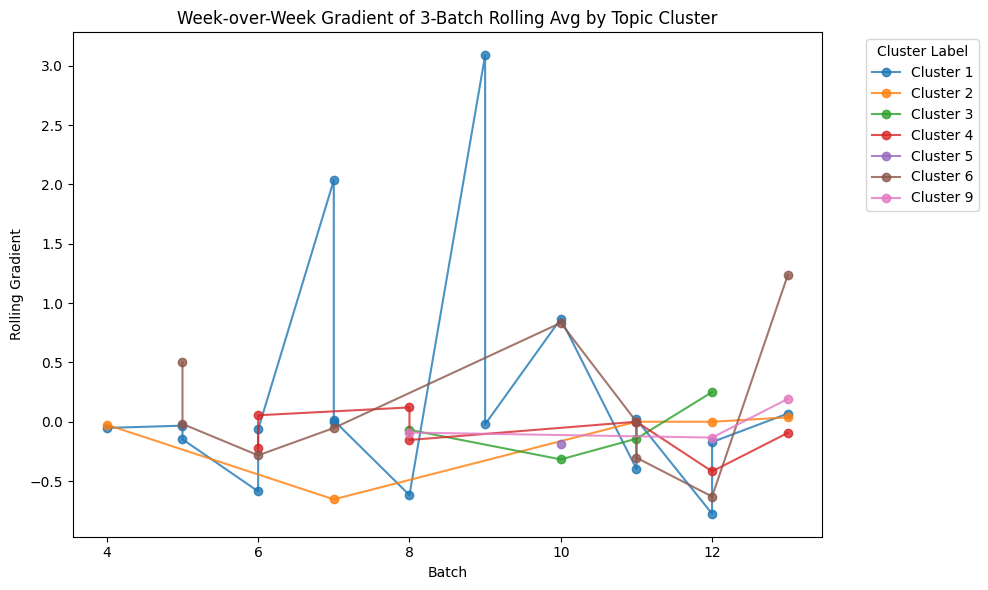

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

for lbl, grp in filtered_df.groupby('topic_cluster_label'):
    ax.plot(
        grp['batch'],
        grp['rolling_gradient'],
        marker='o',
        linestyle='-',
        alpha=0.8,
        label=f'Cluster {lbl}'
    )

ax.set_xlabel('Batch')
ax.set_ylabel('Rolling Gradient')
ax.set_title('Week-over-Week Gradient of 3-Batch Rolling Avg by Topic Cluster')
ax.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


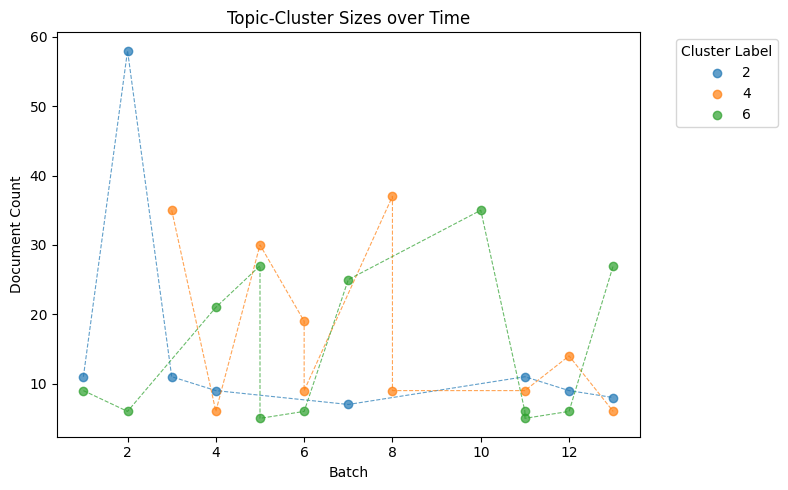

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
clusters = [2, 4, 6]

# group by cluster and plot each separately
for lbl, grp in filtered_df.groupby('topic_cluster_label'):
    if lbl in clusters:
      ax.scatter(grp['batch'], grp['count'], label=lbl, alpha=0.7)
      ax.plot(grp['batch'], grp['count'],
                linestyle='--', linewidth=0.8, alpha=0.7)

ax.set_xlabel('Batch')
ax.set_ylabel('Document Count')
ax.set_title('Topic-Cluster Sizes over Time')
ax.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [19]:
#only taking the first three doc counts into consideration
df_avg_growth = (
    filtered_df
      .groupby('topic_cluster_label')
      .agg(
          avg_growth_rate=('gradient', 'mean'),  # full group mean
          first_three_counts=('count', lambda x: x.head(3).sum())  # sum of first 3 entries
      )
      .reset_index()
)
df_avg_growth.sort_values('avg_growth_rate', ascending=False, inplace=True)
df_avg_growth.head(10)

,topic_cluster_label,avg_growth_rate,first_three_counts
0,1,1.579051,96
5,6,0.737181,36
3,4,0.512992,71
1,2,0.476692,80
2,3,0.162698,44
6,9,0.087814,33
4,5,0.009150,37


In [20]:
#penalize large clusters
alpha = 1.0
df_avg_growth['score'] = df_avg_growth['avg_growth_rate'] / df_avg_growth['first_three_counts'] ** alpha
df_avg_growth.sort_values(['score'], ascending=False)
#6142395 for alpha = 1.0
#6142395 for alpha = 1.3
#6142395 for alpha = 1.5
#6142395 for alpha = 1.7
#2461395 for alpha = 2.0
#without weights: 1642395

,topic_cluster_label,avg_growth_rate,first_three_counts,score
5,6,0.737181,36,0.020477
0,1,1.579051,96,0.016448
3,4,0.512992,71,0.007225
1,2,0.476692,80,0.005959
2,3,0.162698,44,0.003698
6,9,0.087814,33,0.002661
4,5,0.009150,37,0.000247


In [21]:
df_avg_growth = (
    filtered_df
      .groupby('topic_cluster_label')
      .agg(
          avg_growth_rate=('gradient', 'mean'),
          count=('count', 'sum')
      )
      .reset_index()
)

df_avg_growth.sort_values('avg_growth_rate', ascending=False, inplace=True)
df_avg_growth.head(10)



,topic_cluster_label,avg_growth_rate,count
0,1,1.579051,603
5,6,0.737181,178
3,4,0.512992,174
1,2,0.476692,124
2,3,0.162698,83
6,9,0.087814,64
4,5,0.009150,45


In [22]:
#penalize large clusters
alpha = 1.0
df_avg_growth['score'] = df_avg_growth['avg_growth_rate'] / df_avg_growth['count'] * alpha
df_avg_growth.sort_values(['score'], ascending=False)
#1624395 for alpha = 1.0
#1264395 for alpha = 1.3
#2614395 for alpha = 1.5
#2641395 for alpha = 1.7
#2461395 for alpha = 2.0

,topic_cluster_label,avg_growth_rate,count,score
5,6,0.737181,178,0.004141
1,2,0.476692,124,0.003844
3,4,0.512992,174,0.002948
0,1,1.579051,603,0.002619
2,3,0.162698,83,0.001960
6,9,0.087814,64,0.001372
4,5,0.009150,45,0.000203


In [23]:
data.columns

Index(['batch', 'batch_id', 'count', 'topic_rep', 'topic_cluster_label',
       'third'],
      dtype='object')

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

meta_topics = []

data_group = data.groupby('topic_cluster_label')
for cluster_label, rows in data_group:
  #print(f"cluster {cluster_label}")
  topic_count = 0
  doc_count = 0
  all_topics = []
  for idx, row in rows.iterrows():
    all_topics.append(row['topic_rep'])
    topic_count += 1
    doc_count += row['count']
  #print(f"topic_count: {topic_count}, doc_count: {doc_count}")
  #convert into a single string
  " ".join(all_topics)
  #calculate word freq
  vectorizer = CountVectorizer(stop_words='english')
  X = vectorizer.fit_transform(all_topics)
  words = vectorizer.get_feature_names_out()
  words_np = np.array(words)
  freq = X.toarray()
  freq_sum = freq.sum(axis=0)
  freq_top_10_idx = np.argsort(freq_sum)[::-1][:20]
  meta_topic_rep = words_np[freq_top_10_idx]
  #print(f"meta-topic representation: {meta_topic_rep}")

  entry = {
    'cluster_label': cluster_label,
    'num_topics': topic_count,
    'num_docs': doc_count,
    'meta_topic_rep': meta_topic_rep
  }
  meta_topics.append(entry)
  #print("-------")

meta_topics_df = pd.DataFrame(meta_topics)
meta_topics_df
#meta_topics_df.to_csv('meta_topics_df.csv', index=False)

,cluster_label,num_topics,num_docs,meta_topic_rep
0,0,3,28,"[trump, political, https, violent, twitter, th..."
1,1,20,603,"[think, really, don, ai, just, things, work, c..."
2,2,8,124,"[google, browser, firefox, https, chrome, mozi..."
3,3,7,83,"[war, trump, russia, europe, ukraine, nato, eu..."
4,4,10,174,"[rust, language, code, type, memory, languages..."
5,5,4,45,"[country, immigration, border, trump, visa, vi..."
6,6,12,178,"[trump, government, money, market, tesla, ener..."
7,7,2,19,"[visa, terrorist, rights, support, law, protes..."
8,8,7,59,"[memory, hardware, cpu, apple, xbox, windows, ..."
9,9,6,64,"[think, cancer, coffee, blood, sugar, study, h..."
